# Wisconsin CA classification
*Eduardo Carlos Fletes Aréchiga*
MCD - UDG

* Cancer challenge

 ## **BreastCancer classifier, using ANN**
 ### *To predict cancer is malignant (+) or benign (-)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\eduar\Documents\Curso github\proy_prog2\prog2\Challenges\Cancer_detection\CA_data.csv')

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
#Drop the unnecessary columns.
col = ['id','Unnamed: 32']
df = df.drop(col,axis=1)

In [5]:
# checking if there is any missing value
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# checking if there is any missing value with a heatmap
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

`None of the columns have null values. Each of the columns are labelled.`

In [7]:
#Description of statistics from dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#Data Visualize

In [9]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
diagnosis_y = LabelEncoder()

# Ajustar y transformar la columna 'diagnosis' en el DataFrame
df['diagnosis'] = diagnosis_y.fit_transform(df['diagnosis'])

In [10]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\eduar\AppData\Local\Temp\ipykernel_24960\2235595957.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.subplot().set_xticklabels(["Malignant", "Benign"])


[Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')]

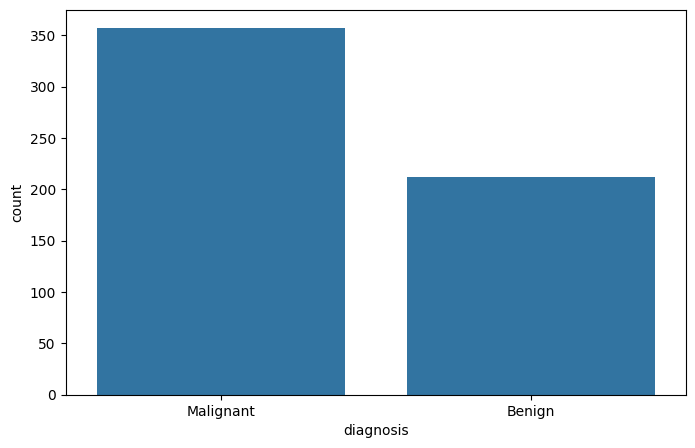

In [11]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x="diagnosis", data=df)
plt.subplot().set_xticklabels(["Malignant", "Benign"])

In [12]:
B,M = df['diagnosis'].value_counts()
print(f"Benign = {B}, Malignant = {M}")

Benign = 357, Malignant = 212


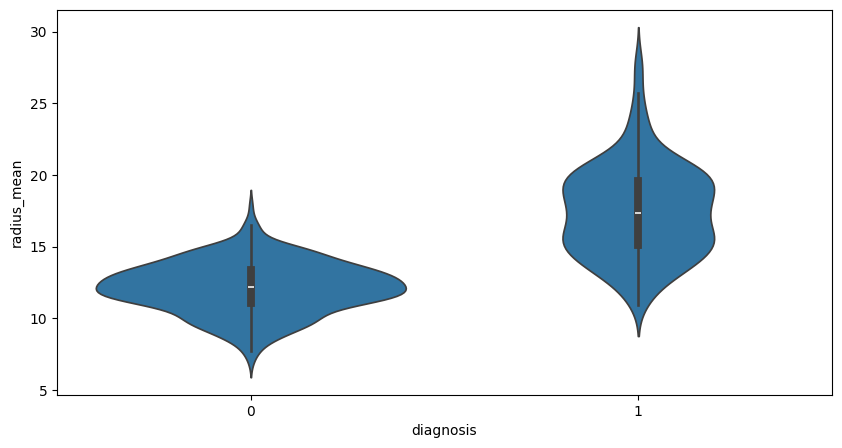

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='diagnosis', y='radius_mean', data=df)
plt.show()

`Since a binary classifier, we would most likely perform binary encoding.`

In [14]:
# from sklearn.preprocessing import LabelEncoder

In [15]:
# diagnosis_y = LabelEncoder()
# df['diagnosis'] = diagnosis_y.fit_transform(df['diagnosis'])

In [16]:
df.head(-5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090


### Personal notes 

Ajuste del tamaño de la figura:
* La línea plt.figure(figsize=(20, 10)) configura el tamaño de la figura para la visualización que se creará a continuación.
En este caso, se establece un tamaño de figura de 20x10 pulgadas.

*Transformación del DataFrame utilizando pd.melt:*
* La siguiente línea de código utiliza la función pd.melt para transformar el DataFrame original (df) en un formato más adecuado para crear un gráfico de caja (boxplot).
El resultado se almacena en un nuevo DataFrame llamado melt_df.

* Los argumentos utilizados son:
id_vars='diagnosis': La columna ‘diagnosis’ se mantiene como una variable de identificación.
var_name='features': Se crea una nueva columna llamada ‘features’ para almacenar los nombres de las características originales.
value_name='value': Se crea otra columna llamada ‘value’ para almacenar los valores de las características originales.

*Creación del gráfico de caja (boxplot):*
* La línea sns.boxplot(x='features', y='value', hue='diagnosis', data=melt_df) crea un gráfico de caja.
En este gráfico:
* El eje x (‘features’) representa las características (columnas) del conjunto de datos.
* El eje y (‘value’) representa los valores de esas características.
* Los datos se agrupan por la columna ‘diagnosis’ (maligno o benigno) utilizando el argumento hue.

La función plt.xticks(rotation=90) rota las etiquetas del eje x para que sean legibles.
Finalmente, plt.show() muestra el gráfico.

*En resumen, este código transforma el DataFrame original y crea un gráfico de caja para visualizar la distribución de los valores de las características según la clasificación de diagnóstico (maligno o benigno)*

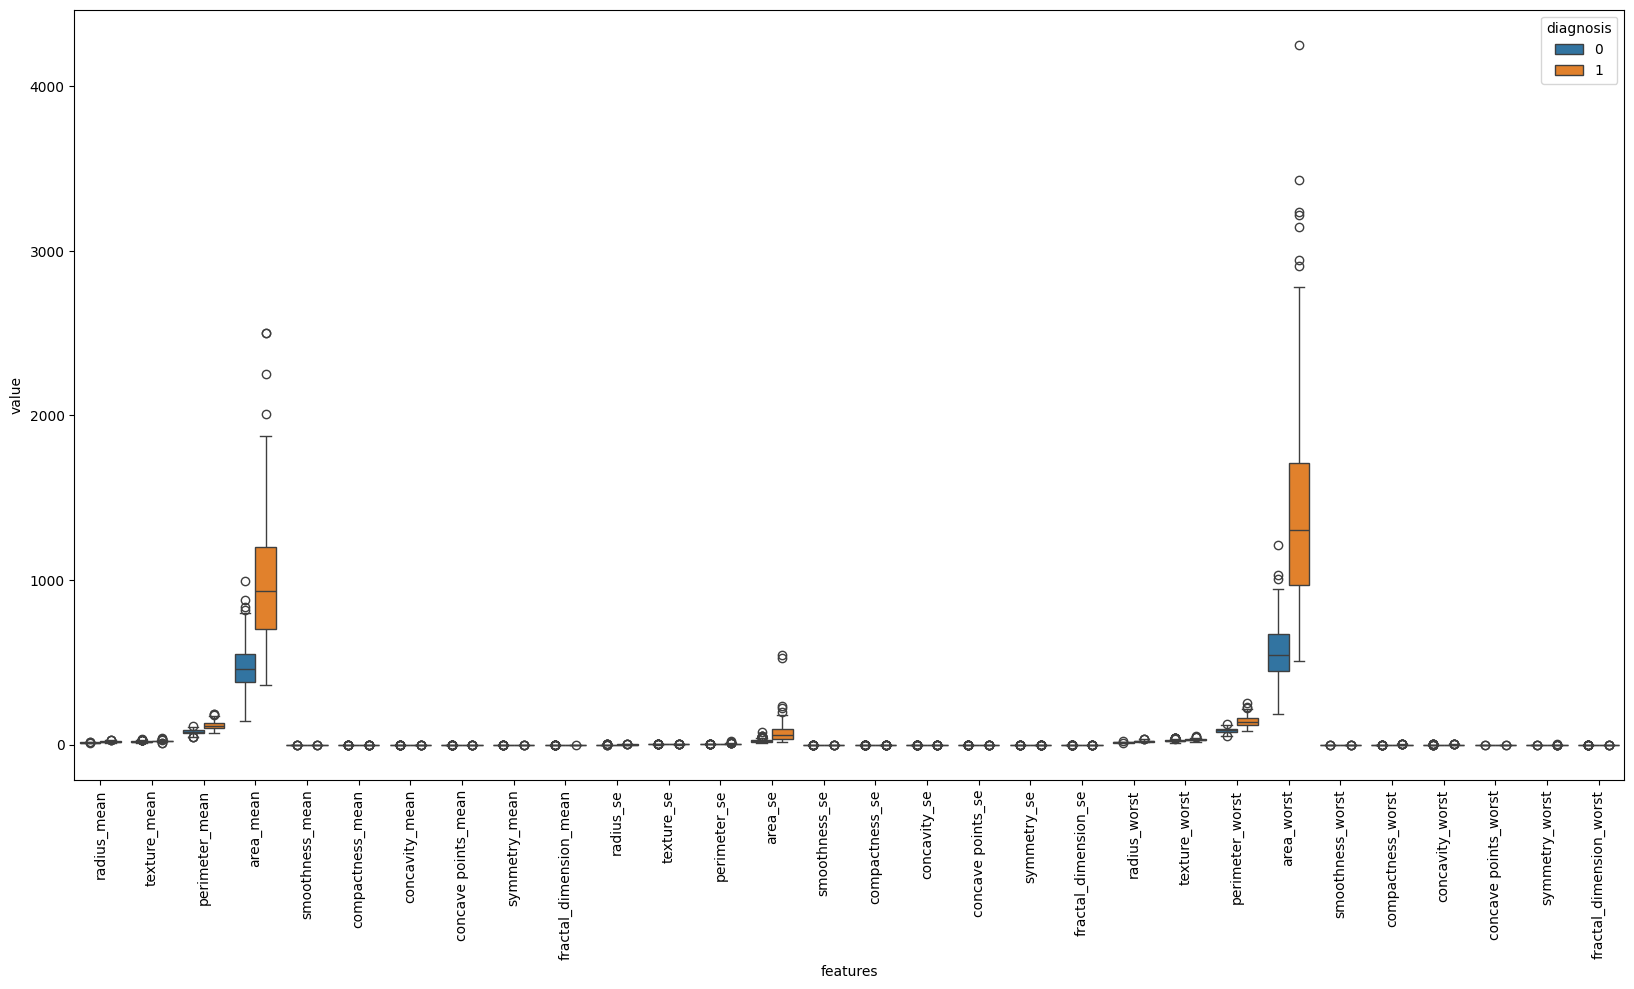

In [17]:
plt.figure(figsize=(20,10))
melt_df = pd.melt(df, id_vars='diagnosis', var_name='features', value_name='value')

# creating a boxplot of all features
sns.boxplot(x='features', y='value', hue='diagnosis', data=melt_df)
plt.xticks(rotation=90)
plt.show()

 ### *Probability density function*

*Personal notes*


* Forma del Violín:
Cada “violín” representa una característica específica del conjunto de datos.
La forma del violín muestra la densidad de los valores en esa característica.
La parte más ancha del violín indica una mayor densidad de valores en esa región.

* Dos Formas en el Violín:
Observas dos formas en cada violín: una en el lado derecho y otra en el lado izquierdo.
Cada forma corresponde a una categoría de diagnóstico:
Lado Derecho: Representa los valores para la categoría ‘M’ (maligno).
Lado Izquierdo: Representa los valores para la categoría ‘B’ (benigno).

* Mediana y Cuartiles:
La línea gruesa dentro del violín es la mediana (valor central) de los datos.
La caja dentro del violín muestra el rango intercuartil (25% al 75%).
Los bigotes (líneas extendidas) indican la dispersión de los valores.

* Comparación entre Categorías:
SE compara visualmente las distribuciones de valores entre las categorías ‘M’ y ‘B’.
Si un violín es más ancho en un lado, significa que hay más valores en esa región para esa categoría.

* Identificación de Características Relevantes:
Busca características con violines significativamente diferentes entre las categorías.
Por ejemplo, si un violín muy ancho en un lado, esa característica podría ser relevante para la clasificación.
En resumen, el gráfico de violín permite explorar cómo se distribuyen las características según el diagnóstico y detectar diferencias importantes entre las categorías.

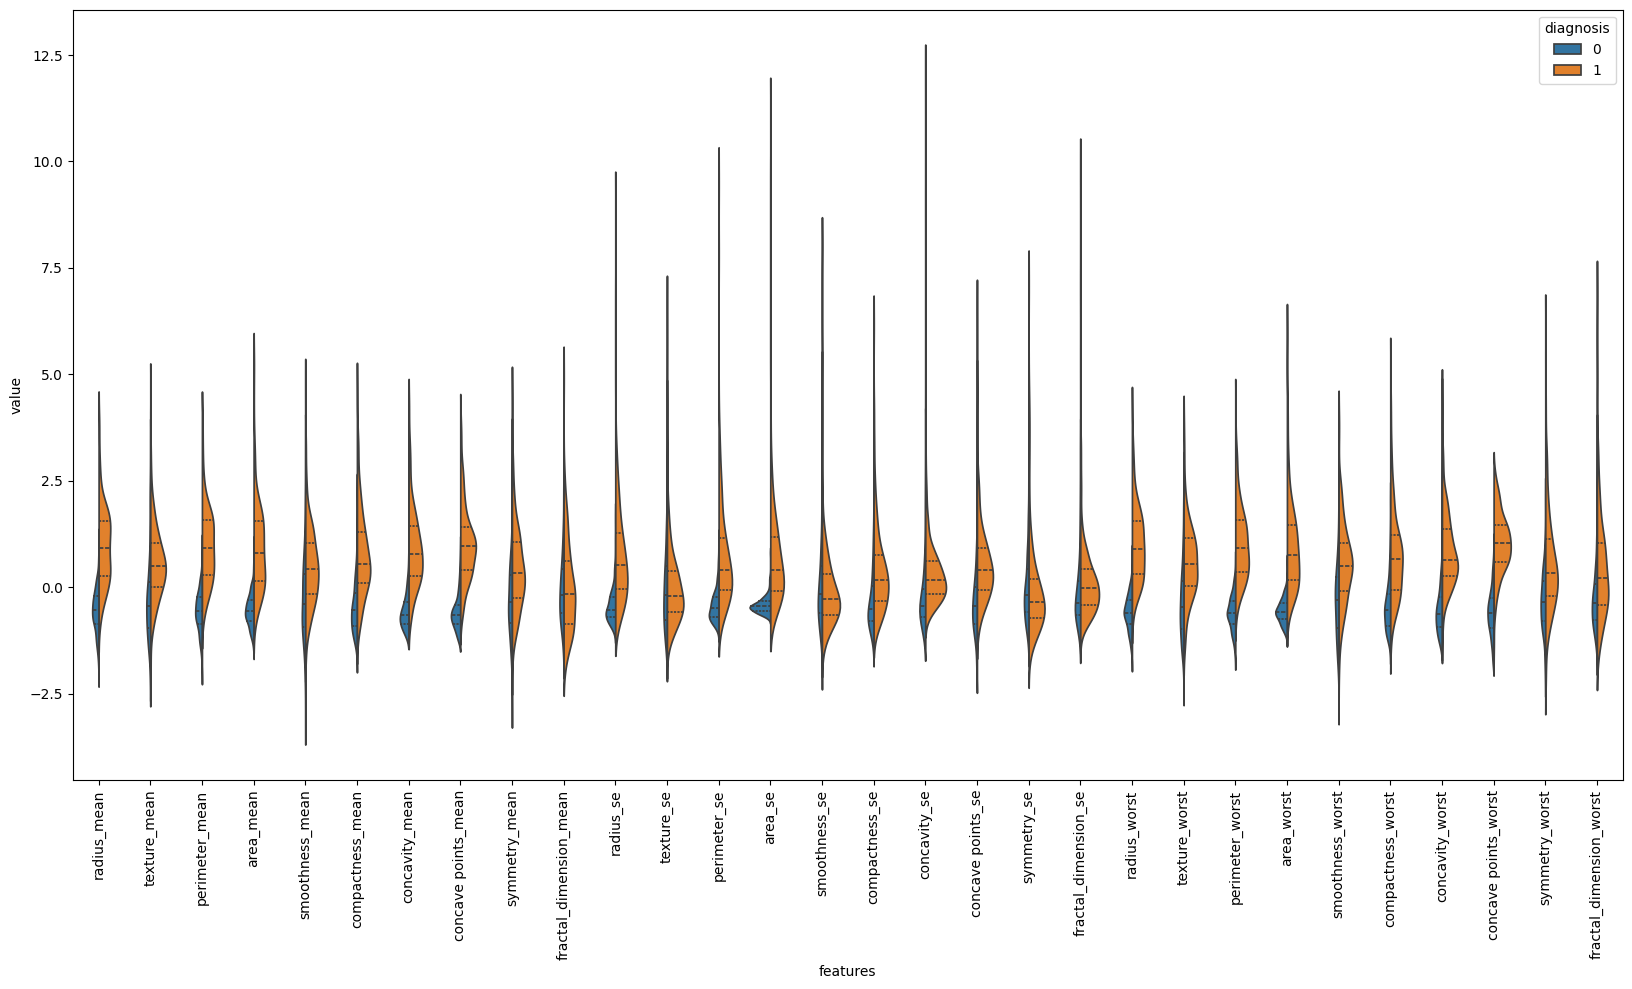

In [18]:
plt.figure(figsize=(20,10))

df_x = df.drop('diagnosis',axis = 1)
df_y = df['diagnosis']
df_normz = (df_x - df_x.mean()) / (df_x.std())      

data = pd.concat([df_y,df_normz.iloc[:,:]],axis=1)

melt_df = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
sns.violinplot(x="features", y="value", hue="diagnosis", data=melt_df, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

*Personal notes*

El eje x (‘radius_mean’) representa el promedio del radio de las células.
El eje y (‘area_mean’) representa el promedio del área de las células.
Los puntos en el gráfico representan las muestras individuales del conjunto de datos.
El argumento hue='diagnosis' colorea los puntos según la categoría de diagnóstico (maligno o benigno).

* Inferencias:
Observa cómo se distribuyen las muestras en función del tamaño del radio y el área de las células.

* Si hay una separación clara entre los puntos coloreados (maligno vs. benigno), podría indicar que estas características son relevantes para la clasificación.


Por ejemplo:
* Si los puntos malignos tienden a tener radios más grandes y áreas más grandes, podría ser una señal importante para la detección de cáncer.
* Si los puntos benignos están más dispersos y no siguen un patrón claro, podría indicar que estas características no son tan distintivas.
En resumen, el gráfico de dispersión permite visualizar la relación entre dos características y cómo se agrupan según la clasificación de diagnóstico.

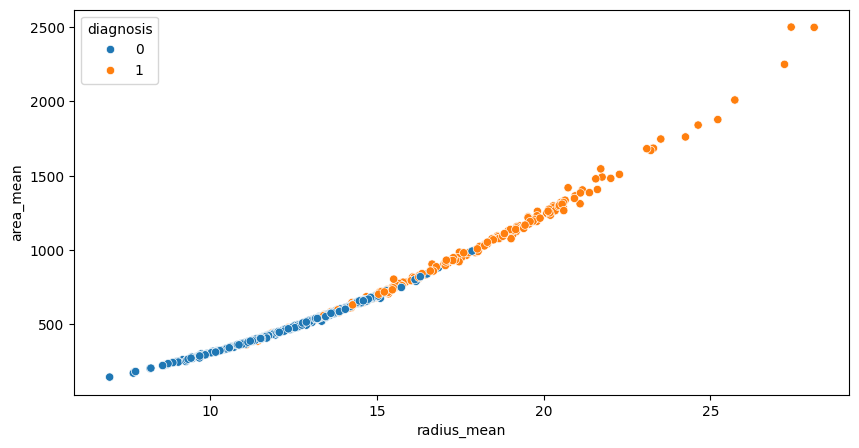

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = 'radius_mean', y = 'area_mean', hue = 'diagnosis')
plt.show()

 ## *MODEL WORKOUT*

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
#Here diagnosis columns refers to the class : Malignant (+) is labelled as 1, Benign (-) is labelled as 0.

In [22]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [23]:
X.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## *Divide data into trained data, and test data.*

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

` Scaling data is important. Different columns are concentrated at different areas.`

`(radius mean is concentrated around 20, perimeter around 100s, etc)`

In [25]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [26]:
X_train.shape

(455, 30)

In [27]:
X_test.shape

(114, 30)

In [28]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [29]:
X_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [30]:
y.head(-5)

0      1
1      1
2      1
3      1
4      1
      ..
559    0
560    0
561    0
562    1
563    1
Name: diagnosis, Length: 564, dtype: int32

### *MODEL WORK.*

In [5]:
# !pip install tensorflow --ignore-installed



^C


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [32]:
#ANN Design : 30 - 16 - 16 - 1
#Input
ann_model = Sequential()

#1st Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim = 30))

#2nd Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

#Output Layer
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #classify

In [33]:
#Compile the model

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# train the model
ann_model.fit(X_train, y_train, batch_size=100, epochs=150, validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 52ms/step - loss: 0.6926 - accuracy: 0.7060 - val_loss: 0.6917 - val_accuracy: 0.6703
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.7115 - val_loss: 0.6900 - val_accuracy: 0.7033
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6890 - accuracy: 0.7390 - val_loss: 0.6878 - val_accuracy: 0.7363
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6864 - accuracy: 0.7610 - val_loss: 0.6848 - val_accuracy: 0.8022
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6829 - accuracy: 0.8242 - val_loss: 0.6808 - val_accuracy: 0.8462
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6783 - accuracy: 0.8681 - val_loss: 0.6754 - val_accuracy: 0.8901
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.8929 - val_loss: 0.6682 - val_accuracy: 0.9231
Epoch 8/150
4/4 [=======

In [35]:
# Testing ANN Model
#seperating as class 0 and 1 as per sigmoid function
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)


4/4 [==============================] - 0s 1ms/step


In [36]:
loss, accuracy = ann_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9474


In [37]:
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

Loss in the ANN Model design : 0.1309
Accuracy in the ANN Model design : 94.7368


In [38]:
cm = confusion_matrix(y_test,y_pred)

In [39]:
cm

array([[64,  3],
       [ 3, 44]], dtype=int64)

<Axes: >

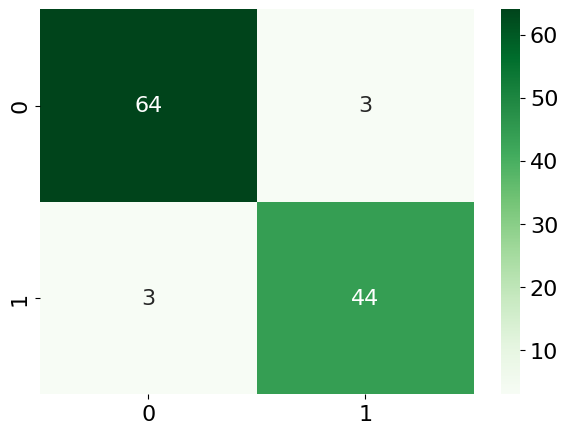

In [40]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cm,annot=True,cmap='Greens')

In [41]:
y_pred_1 = ann_model.predict(X_test)

# AUC score for the binary classification problem
auc_score = roc_auc_score(y_test, y_pred_1)

print("AUC Score:", auc_score)


4/4 [==============================] - 0s 1ms/step
AUC Score: 0.989838043823436


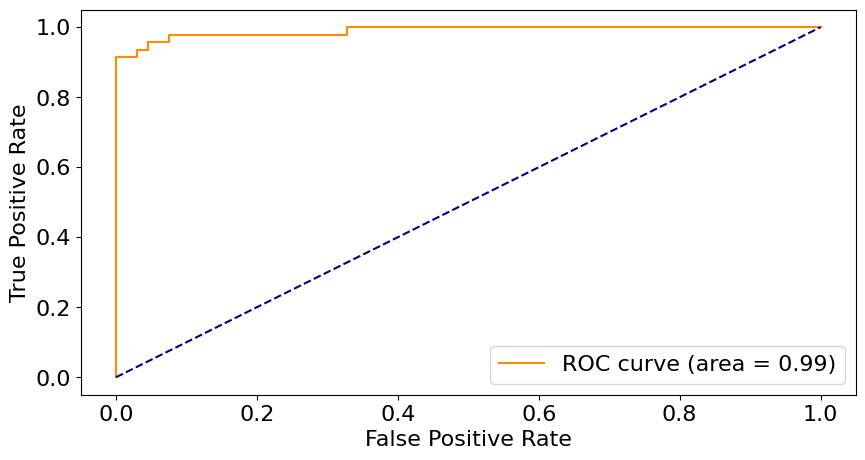

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [44]:
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.1310 - val_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9868 - val_loss: 0.1277 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.1266 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.1235 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9912 - val_loss: 0.1224 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9912 - val_loss: 0.1233 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9912 - val_loss: 0.1239 - val_accuracy: 0.9474
Epoch 8/100
1

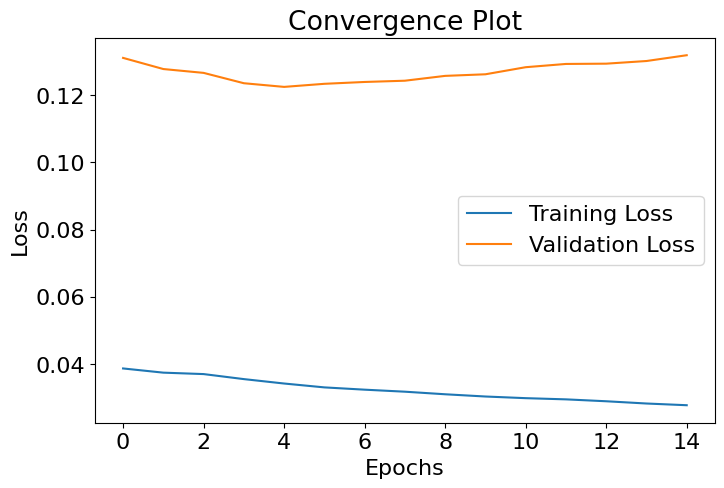

In [45]:
# plot the training and validation loss over the epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convergence Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

`The above plot shows`

`The training loss is decreasing and the validation loss is more or less stable,`
`then the model is likely converging well.`